<a href="https://colab.research.google.com/github/Gonnabattula-Sravani/FML-LSB/blob/main/univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
     


In [6]:
data = pd.read_csv("/content/drive/MyDrive/company.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
p=data.corr()
p

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
p.shape

(4, 4)

In [11]:
A=data['TV'].values
A

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [13]:
B=data['Sales'].values
B

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [17]:
A=A.reshape(-1,1)
B=B.reshape(-1,1)

In [27]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=30, random_state=42)
A_train.shape,A_test.shape,B_train.shape,B_test.shape

((170, 1), (30, 1), (170, 1), (30, 1))

In [28]:
reg=linear_model.LinearRegression()
reg.fit(A,B)

LinearRegression()

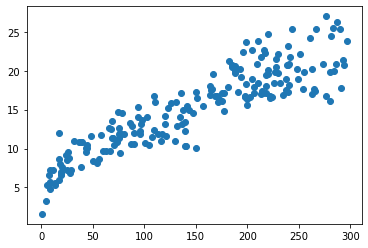

In [29]:
plt.scatter(A,B)
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
B_pred2 = reg.predict(A_train)

print(f'MAE = {mean_absolute_error(B_train, B_pred2)}')
print(f'MSE = {mean_squared_error(B_train, B_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(B_train, B_pred2))}')
print(f'R_2 = {r2_score(B_train, B_pred2)}')
     

MAE = 1.8300381041194815
MSE = 5.245332383772938
RMSE = 2.290269063619587
R_2 = 0.8050538160003574


In [40]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
B_pred1 = reg.predict(A_test)

print(f'MAE = {mean_absolute_error(B_test, B_pred1)}')
print(f'MSE = {mean_squared_error(B_test, B_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(B_test, B_pred1))}')
print(f'R_2 = {r2_score(B_test, B_pred1)}')

MAE = 1.8336991712778803
MSE = 5.061409143920872
RMSE = 2.249757574477942
R_2 = 0.8403491493606532


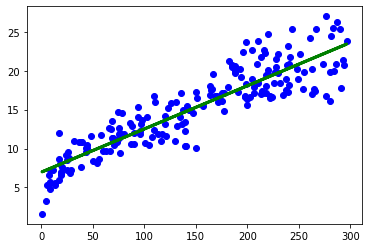

In [32]:
plt.scatter(A_train, B, color='blue')
plt.plot(A, reg.predict(A), color='green', linewidth=3)
plt.show()

In [41]:
reg.score(A_test,B_test)

0.8403491493606532